In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA

In [2]:
lyrics = pd.read_csv('lyrics.csv')
lyrics1 = lyrics.query('genre != "Not Available"')
lyrics1 = lyrics1.dropna()

lyrics2 = lyrics1[lyrics1["genre"] == "Rock"].sample(n=22000)
lyrics3 = lyrics1[lyrics1["genre"] == "Pop"].sample(n=22000)
lyrics4 = lyrics1[lyrics1["genre"] == "Hip-Hop"].sample(n=22000)
lyrics0 = pd.concat([lyrics2, lyrics4])

In [3]:
from sklearn.decomposition import TruncatedSVD

x_vec = CountVectorizer().fit_transform(lyrics0["lyrics"])

songs = TfidfTransformer().fit_transform(x_vec)

Y = TruncatedSVD(n_components=2).fit_transform(songs)

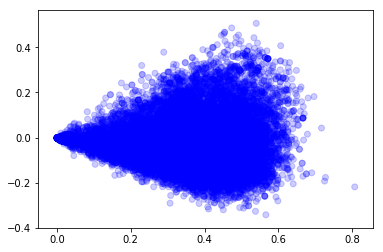

In [4]:
U = lyrics0["genre"].map({"Rock":"white", "Hip-Hop":"blue"})

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.2)

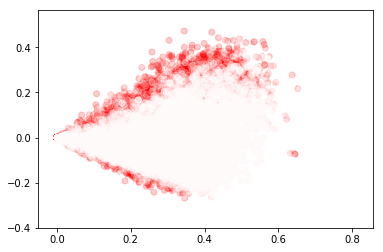

In [5]:
U = lyrics0["genre"].map({"Rock": "red", "Hip-Hop":"white"})

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.2)

### In this picture we can see the ways the singular values in the different genres of rock and hip-hop appear in different places in the plane